# CSE428: Coding Assignment-2

In [ ]:
NAME = "Akib Zabed Ifti"
ID = "23341129"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks (3 guided, 1 unguided). Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Always use ```method='auto'``` while using the correlation function, unless you want to see how fast/slow a method is.)




We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [37]:
from skimage.io import imread, imshow
from skimage import img_as_float
from skimage import color
from skimage.util import random_noise
from skimage.transform import resize
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [5]:
# Define helper functions
def plot_image(img, figsize = (6,6)):
    plt.figure(figsize = figsize)
    if len(img.shape) == 2:
        plt.imshow(img, cmap = "gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    print("Image shape = {}".format(img.shape))

def plot_kernel(kernel, cmap = "Reds"):
    plt.imshow(kernel, interpolation = "none", cmap = "Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape = {}".format(kernel.shape))

def gaussian_kernel(width=1, size = 10):
    gaussian1dkernel = signal.gaussian(size,width).reshape(size,1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2


## **Task 1: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


Image shape = (512, 512, 3)


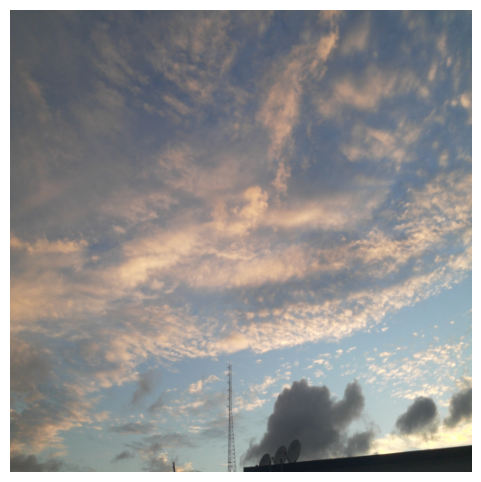

In [8]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.
image = imread("/content/skying.jpg") / 255
image = resize(image, (512, 512), anti_aliasing=True)

plot_image(image)

In [9]:
# Define any symmetric kernel of size (105, 105)
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = np.zeros((105,105)) # TO-BE-COMPLETED
for i in range(105):
    for j in range(105):
        kernel_symmetric[i][j] = i+j-104
        kernel_symmetric[i][j] = kernel_symmetric[i][j]/104

print(kernel_symmetric)

[[-1.         -0.99038462 -0.98076923 ... -0.01923077 -0.00961538
   0.        ]
 [-0.99038462 -0.98076923 -0.97115385 ... -0.00961538  0.
   0.00961538]
 [-0.98076923 -0.97115385 -0.96153846 ...  0.          0.00961538
   0.01923077]
 ...
 [-0.01923077 -0.00961538  0.         ...  0.96153846  0.97115385
   0.98076923]
 [-0.00961538  0.          0.00961538 ...  0.97115385  0.98076923
   0.99038462]
 [ 0.          0.00961538  0.01923077 ...  0.98076923  0.99038462
   1.        ]]


In [10]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = np.random.randn(105,105) # TO-BE-COMPLETED
print(kernel_asymmetric)

[[ 0.10803563 -0.88785722  0.48826894 ...  0.46689213  0.24357936
   0.2587823 ]
 [ 0.32269057  1.48594317 -0.36927751 ...  0.6581433  -0.36455912
   1.67433065]
 [ 1.54339838 -0.54543181  0.12900421 ...  0.6379713  -0.42260884
  -0.40646239]
 ...
 [ 1.22830769  0.67996892 -1.44097128 ...  1.84290278  0.01718551
  -1.78867941]
 [-2.20808402 -0.47404834  1.23486954 ... -0.75041688 -1.12816826
   0.11599015]
 [ 0.44203914 -1.79195764  0.37496012 ... -0.18270373 -1.87343949
  -0.096034  ]]


In [11]:
# Filter the image with the symmetric kernel using the correlation function

for i in range(3):
    filtered_image_symmetric = signal.correlate(image[:,:,i], kernel_symmetric, mode = "same", method = "auto")# TO-BE-COMPLETED
    filtered_image_asymmetric = signal.correlate(image[:,:,i], kernel_asymmetric, mode = "same", method = "auto")

(-0.5, 511.5, 511.5, -0.5)

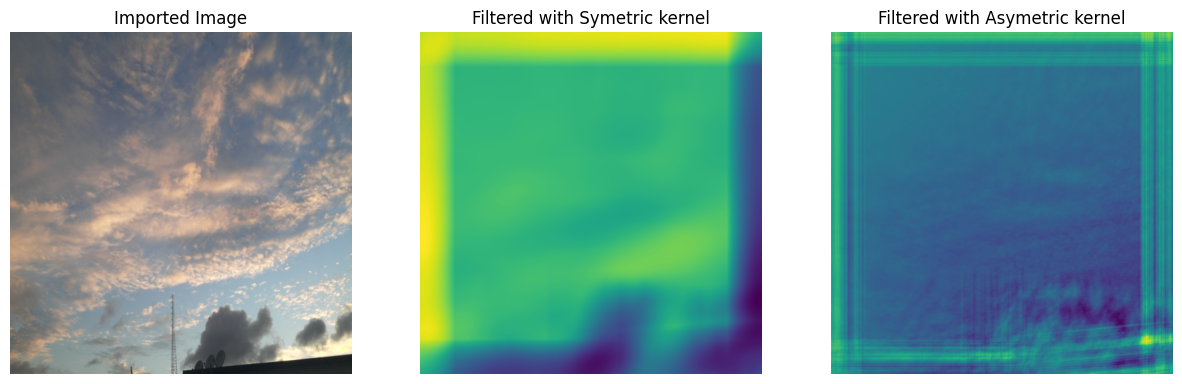

In [12]:
# Display the images side by side (with proper labeling, which is which)
plt.figure(figsize= (15,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(1,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Filtered with Symetric kernel")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Filtered with Asymetric kernel")
plt.axis("off")

### **Answer to Task 1.1** <br>

### Write your answer here. Compare the outputs.
With the imported image, filtering with symetric kernel produced something that is blurred and transition of colors are smooth. Meanwhile, Assymetric kernel produced something that doesn't make sense and transition of colors are rough.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

(-0.5, 511.5, 511.5, -0.5)

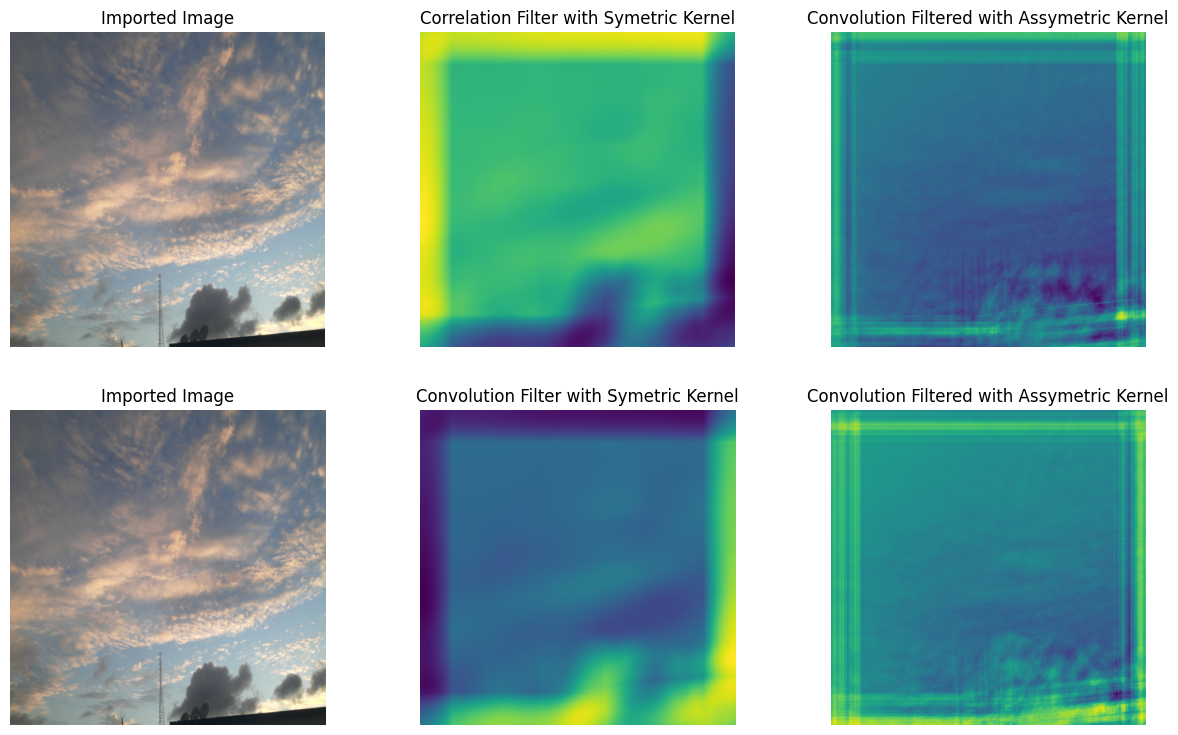

In [13]:
# Filter the image with the asymmetric kernel using the convolution function
for i in range(3):
    filtered_image_symmetric_C = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto')
    filtered_image_asymmetric_C = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto')

plt.figure(figsize= (15,9))
plt.subplot(2,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,2)
plt.imshow(filtered_image_symmetric)
plt.title("Correlation Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,3)
plt.imshow(filtered_image_asymmetric)
plt.title("Convolution Filtered with Assymetric Kernel")
plt.axis("off")
plt.subplot(2,3,4)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image")
plt.subplot(2,3,5)
plt.imshow(filtered_image_symmetric_C)
plt.title("Convolution Filter with Symetric Kernel")
plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(filtered_image_asymmetric_C)
plt.title("Convolution Filtered with Assymetric Kernel")
plt.axis("off")

### **Answer to Task 1.2** <br>

Filtering with a symetric kernel on my imported image resulted in something that is blurred and has a seamless transition of colours. In the meantime, the asymetric kernel gave illogical results and rapid colour transitions.

Convolution, a type of correlation in which the kernel is transposed, produces the same effect as a symetric kernel filter but in the other direction. However, we do not observe an inverse effect with assymetric kernel in the case of assymetric filtering.

## **Task 2: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

In [14]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image
image = imread("diamond2.jpg") # TO-BE-COMPLETED
image = image/255
image = color.rgb2gray(image)

In [15]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[-4, -2, 0], # TO-BE-COMPLETED
                     [-2, 0, 2], # TO-BE-COMPLETED
                     [0, 2, 4]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, -2, -4], # TO-BE-COMPLETED
                     [2, 0, -2], # TO-BE-COMPLETED
                     [4, 2, 0]]) # TO-BE-COMPLETED

(-0.5, 625.5, 625.5, -0.5)

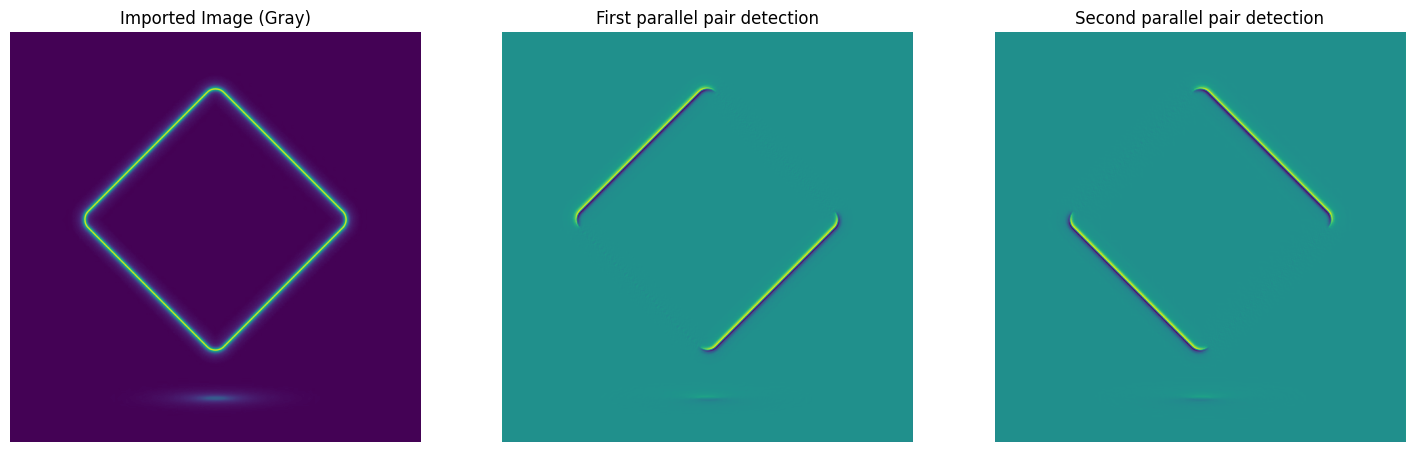

In [16]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.correlate(image, kernel_1, mode = 'same', method = 'auto') # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected =signal.correlate(image, kernel_2, mode = 'same', method = 'auto')  # TO-BE-COMPLETED

# plot the two filtered images side by side

plt.figure(figsize= (18,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imported Image (Gray)")
plt.subplot(1,3,2)
plt.imshow(first_pair_detected)
plt.title("First parallel pair detection")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(second_pair_detected)
plt.title("Second parallel pair detection")
plt.axis("off")

### **Answer to Task 2** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?

In order to detect diagonal edges, I employed the Sobel mask. Sobel masks have slightly better noise-suppression characteristics, thus I didn't apply Prewitt. The outputs I was obtaining after adjusting the coefficients were unusual. There are other kernels like Prewitt and Adibs kernel that can carry out the same task, thus my kernels are not the only ones that can.

# Task 3: Sharpen with Edge Detectors <br>
### Try to come up with two 5 x 5 filter kernels which are able to detect and sharpen ***the vertical and horizontal edges*** of the windows and bricks<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[The window+brick wall image can be downloaded from here: https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link]

*Hint: For this task, visualize the 3x3 kernel into a bigger 5x5 one. Both will look almost the same, except for their size.*

In [17]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread("/content/House-Windows.png") # TO-BE-COMPLETED
image = image/255
image = color.rgb2gray(image)

In [18]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([ [-1, 0, 1, 0, -1],
                      [-1, 0, 1, 0, -1],
                      [-1, 0, 1, 0, -1],
                      [-1, 0, 1, 0, -1],
                      [-1, 0, 1, 0, -1],])

kernel_2 = np.array([ [-1, -1, -1, -1, -1],
                      [ 0,  0,  0,  0,  0],
                      [ 1,  1,  1,  1,  1],
                      [ 0,  0,  0,  0,  0],
                      [-1, -1, -1, -1, -1],])

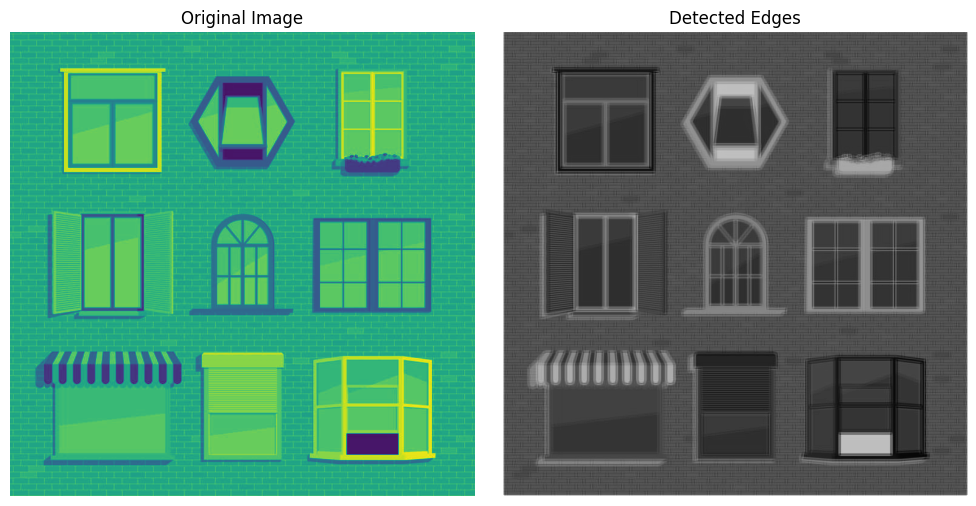

In [19]:
# detect both types of the edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

horizontal_edges_detected = signal.correlate(image, kernel_1, mode = 'same', method = 'auto') # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

vertical_edges_detected = signal.correlate(image, kernel_2, mode = 'same', method = 'auto')  # TO-BE-COMPLETED

# plot the two filtered images side by side

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(vertical_edges_detected + horizontal_edges_detected, cmap='gray')
plt.title('Detected Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

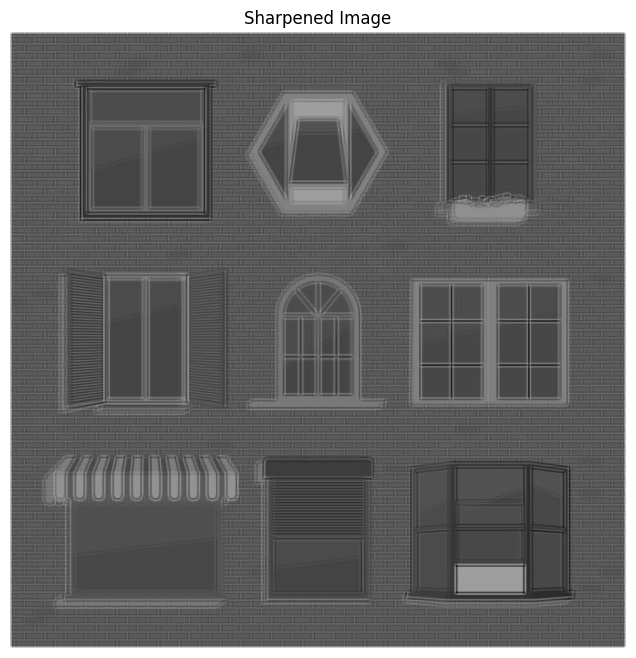

In [20]:
# plot the sharpened image

main_img_intensity_fraction =   0.8      #
edge_horiz_intensity_fraction = 0.25     #
edge_vert_intensity_fraction =  0.25     # --> You can vary these 3 values to see what happens

# shapened image generation

sharpened_image = (main_img_intensity_fraction * image) + \
                  (edge_horiz_intensity_fraction * horizontal_edges_detected) + \
                  (edge_vert_intensity_fraction * vertical_edges_detected) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges


# plot the final output

plt.figure(figsize=(8, 8))
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? How does changing the fraction values affect the sharpening? Among the window and bricks, which ones become more prominent in the final output?
I provided filter kernels for edge detection, in kernel_1 highlights vertical edges, and kernel_2 highlights horizontal edges. Their coefficients are designed to enhance pixel intensity changes across edges.

The fractions in the sharpening process control component contributions. Increasing main_img_intensity_fraction emphasizes the original image, while edge fractions amplify corresponding edges. Decreasing edge fractions reduces edge prominence.

In the "window and bricks" scenario, increasing edge_horiz_intensity_fraction emphasizes bricks, and edge_vert_intensity_fraction emphasizes windows. Adjusting fractions affects final output balance between original image and enhanced edge

# Task 4: Noise Reduction/Denoising *(Unguided)*<br>
### Use 'gaussian_filter' from scipy.ndimage for this task to denoise two given images: <br> (i) A Noisy Image, (ii) Just Noise filled Image.<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[(i) Noisy Image: https://drive.google.com/file/d/1I1ye90IggplNRVVtZfFTLXLqQWJNGbCM/view?usp=sharing <br>
 (ii) Just Noise: https://drive.google.com/file/d/13AMtZR8ZCGHVcsw7tOJBgSFDnDhgtL9b/view?usp=sharing]

### Tune the 'sigma' value to obtain different smoothening gaussian kernels. This will give you various degrees of denoising. For image (i), your task is to smoothen the image to get as low noise as possible. For image (ii), your task is to get an almost flat intensity image.

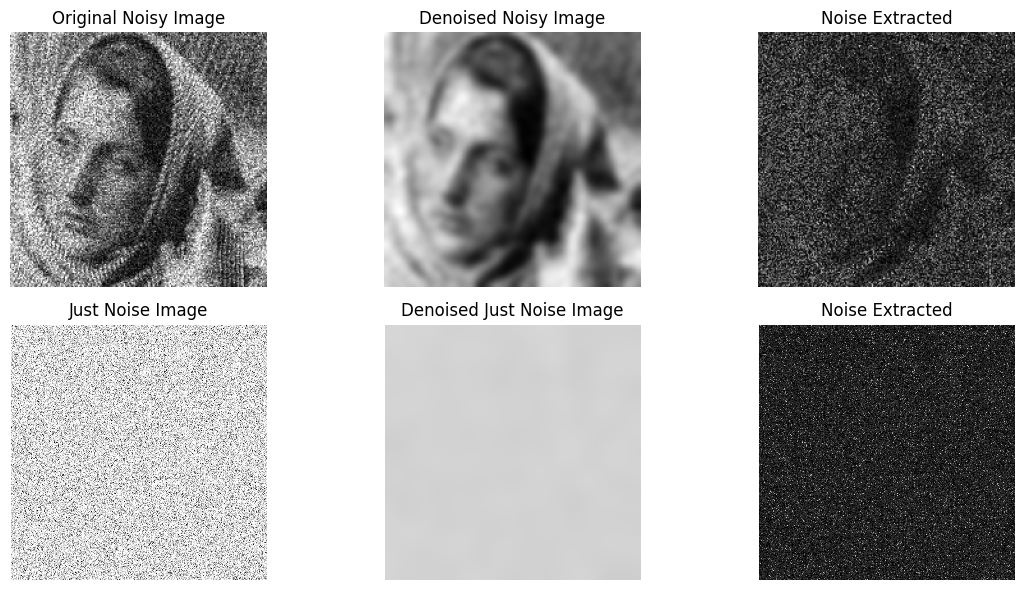

In [36]:
#Your Code
from scipy.ndimage import gaussian_filter
from skimage import io

noisy_image = imread("/content/Noisy Image.png")
noisy_image= noisy_image/255
just_noise_image =imread("/content/Noise.png")
just_noise_image = just_noise_image/255

sigma_1 = 3.0
sigma_2 = 10.0
denoised_noisy_image = gaussian_filter(noisy_image, sigma=sigma_1)
denoised_just_noise_image = gaussian_filter(just_noise_image, sigma=sigma_2)


plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(denoised_noisy_image, cmap='gray')
plt.title('Denoised Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(noisy_image - denoised_noisy_image), cmap='gray')
plt.title('Noise Extracted')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(just_noise_image, cmap='gray')
plt.title('Just Noise Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(denoised_just_noise_image, cmap='gray')
plt.title('Denoised Just Noise Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(np.abs(just_noise_image - denoised_just_noise_image), cmap='gray')
plt.title('Noise Extracted')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Answer to Task 4** <br>

### Write your answer here. Subjectively speaking, how much 'sigma' value for each image was good enough for denosing in your opinion? How do too high (8,12,15 etc.) or too low (0.1, 0.01 etc.) 'sigma' values influence the images?
For the noisy image, a'sigma' value of roughly 3.0 provided a decent combination between lowering noise and preserving image details. While values much higher than 2.0 (e.g., 8, 12, 15) resulted to significant blurring and the loss of fine features, values significantly lower than 2.0 (e.g., 0.1, 0.01) tended to preserve noise.

For the noise image, a'sigma' value of about 5.0 seems to be effective at flattening the intensity while preserving some texture in the picture. While'sigma' values as low as 0.1 and 0.01 failed to successfully flatten the intensity, those as high as 8, 12 and 15 oversmoothed and lost texture.

In general, using very low 'sigma' values results in minimal noise reduction, while very high 'sigma' values cause excessive blurring.


## **The END**